In [1]:
#K Means Algo is a unsupervised ml algorithm used for clustering data into distinct groups it automatically identifies pattern in the data without predefined labels

In [29]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans   #Kmeans class of cluster submodule of sklearn module
import warnings  #so as to ignore warnings of few functions

warnings.filterwarnings('ignore')

In [30]:
data=pd.read_csv('Wholesale data.csv')
data.head()

,Channel,Region,Fresh,Milk,Grocery,Frozen,Paper,Delicassen
0,2,3,12669,9656,7561,214,2674,1338
1,2,3,7057,9810,9568,1762,3293,1776
2,2,3,6353,8808,7684,2405,3516,7844
3,1,2,13265,1196,4221,6404,507,1788
4,2,3,22615,5410,7198,3915,1777,5185


In [31]:
data.describe()    #stats of data

,Channel,Region,Fresh,Milk,Grocery,Frozen,Paper,Delicassen
count,10.000000,10.000000,10.000000,10.000000,10.000000,10.00000,10.000000,10.00000
mean,1.600000,2.300000,10304.000000,5743.200000,6397.900000,1904.40000,2138.300000,2528.50000
std,0.516398,0.823273,5174.539851,3690.536089,2563.511717,1952.15802,1398.017092,2297.36633
min,1.000000,1.000000,5963.000000,575.000000,2010.000000,174.00000,300.000000,545.00000
25%,1.000000,2.000000,6529.000000,2375.500000,4728.750000,582.50000,982.000000,1223.25000
50%,2.000000,2.500000,8496.000000,6593.500000,7086.500000,1381.00000,2225.500000,1738.00000
75%,2.000000,3.000000,12533.250000,8877.000000,7653.250000,2253.75000,3254.750000,2772.00000
max,2.000000,3.000000,22615.000000,9810.000000,9568.000000,6404.00000,4200.000000,7844.00000


In [32]:
#standerdizing the data
from sklearn.preprocessing import StandardScaler   #usin StandardScaler class to scale values

scaler = StandardScaler()   #initiade that class
data_scaled= scaler.fit_transform(data)   #using object/method fit_transform of that StandardScaler class - fit data in singe transform

pd.DataFrame(data_scaled).describe()   #converting object data_scaled to dataframe
#print(data_scaled)

,0,1,2,3,4,5,6,7
count,1.000000e+01,1.000000e+01,1.000000e+01,1.000000e+01,1.000000e+01,1.000000e+01,1.000000e+01,1.000000e+01
mean,-1.776357e-16,2.775558e-16,-4.440892e-17,7.771561e-17,1.332268e-16,-6.938894e-19,-1.110223e-16,-5.551115e-18
std,1.054093e+00,1.054093e+00,1.054093e+00,1.054093e+00,1.054093e+00,1.054093e+00,1.054093e+00,1.054093e+00
min,-1.224745e+00,-1.664479e+00,-8.842942e-01,-1.476144e+00,-1.804264e+00,-9.343515e-01,-1.386062e+00,-9.100824e-01
25%,-1.224745e+00,-3.841106e-01,-7.689958e-01,-9.618840e-01,-6.863392e-01,-7.137767e-01,-8.718400e-01,-5.988833e-01
50%,8.164966e-01,2.560738e-01,-3.683032e-01,2.428631e-01,2.831460e-01,-2.826165e-01,6.574803e-02,-3.627023e-01
75%,8.164966e-01,8.962582e-01,4.541149e-01,8.950773e-01,5.161884e-01,1.886360e-01,8.417935e-01,1.117243e-01
max,8.164966e-01,8.962582e-01,2.507843e+00,1.161561e+00,1.303516e+00,2.429616e+00,1.554504e+00,2.438892e+00


In [33]:
help(KMeans)

Help on class KMeans in module sklearn.cluster._kmeans:

class KMeans(_BaseKMeans)
 |  KMeans(n_clusters=8, *, init='k-means++', n_init='auto', max_iter=300, tol=0.0001, verbose=0, random_state=None, copy_x=True, algorithm='lloyd')
 |
 |  K-Means clustering.
 |
 |  Read more in the :ref:`User Guide <k_means>`.
 |
 |  Parameters
 |  ----------
 |
 |  n_clusters : int, default=8
 |      The number of clusters to form as well as the number of
 |      centroids to generate.
 |
 |      For an example of how to choose an optimal value for `n_clusters` refer to
 |      :ref:`sphx_glr_auto_examples_cluster_plot_kmeans_silhouette_analysis.py`.
 |
 |  init : {'k-means++', 'random'}, callable or array-like of shape             (n_clusters, n_features), default='k-means++'
 |      Method for initialization:
 |
 |      * 'k-means++' : selects initial cluster centroids using sampling             based on an empirical probability distribution of the points'             contribution to the overall ine

In [34]:
kmeans = KMeans(n_clusters=2, init='k-means++')   #initialize algo with k means++  && and 2 cluster

kmeans.fit(data_scaled)

kmeans.inertia_   #attribute of KMeans used to give inertia of the value

64.14587622648762

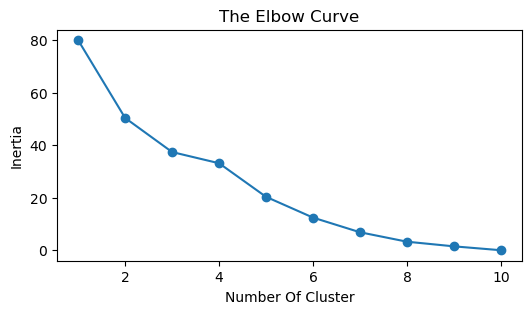

In [35]:
# So as to check if it's correct using confusion metrix
wcss=[]

for cluster in range(1, 11):   #at starting cluster=1 means n_cluster=1
    kmeans=KMeans(n_clusters=cluster, init='k-means++')
    kmeans.fit(data_scaled)
    wcss.append(kmeans.inertia_)   #calculating inertia and append(adding at end of list) that to list wcss
    #then so on cluster=2 as ++ , 3,4,5....21 again loop goes for cluster and n_cluster

plt.figure(figsize=(6,3))
plt.plot(range(1,11), wcss, marker='o')
plt.title("The Elbow Curve")
plt.xlabel("Number Of Cluster")
plt.ylabel('Inertia')
plt.show()

In [37]:
#Build model with 4 or 5-Cluster

kmeans=KMeans(n_clusters=4, init='k-means++')   #here final clusters =4 
kmeans.fit(data_scaled)
pred=kmeans.predict(data_scaled)  #getting predictions from k-means with predict method on datascaled(No strain ,y train cuzz unsupervised learning) && having no outputs

df=pd.DataFrame(data_scaled)
df.head()

,0,1,2,3,4,5,6,7
0,0.816497,0.896258,0.481768,1.117576,0.478256,-0.912753,0.403913,-0.546233
1,0.816497,0.896258,-0.661438,1.161561,1.303516,-0.076891,0.870634,-0.345267
2,0.816497,0.896258,-0.804848,0.875370,0.528833,0.270305,1.038774,2.438892
3,-1.224745,-0.384111,0.603178,-1.298773,-0.895121,2.429616,-1.229986,-0.339761
4,0.816497,0.896258,2.507843,-0.095169,0.328994,1.085649,-0.272417,1.218873


In [40]:
df['Cluster']=pred     #pred is object that contais predictions
df    #give 4th belongs to cluster no. 3

,0,1,2,3,4,5,6,7,Cluster
0,0.816497,0.896258,0.481768,1.117576,0.478256,-0.912753,0.403913,-0.546233,1
1,0.816497,0.896258,-0.661438,1.161561,1.303516,-0.076891,0.870634,-0.345267,1
2,0.816497,0.896258,-0.804848,0.875370,0.528833,0.270305,1.038774,2.438892,1
3,-1.224745,-0.384111,0.603178,-1.298773,-0.895121,2.429616,-1.229986,-0.339761,3
4,0.816497,0.896258,2.507843,-0.095169,0.328994,1.085649,-0.272417,1.218873,2
5,-1.224745,-1.664479,-0.181503,-1.476144,-1.804264,-0.934351,-0.876364,-0.616433,0
6,0.816497,0.896258,0.371155,-0.726676,0.237298,-0.769123,0.755273,-0.910082,1
7,-1.224745,-1.664479,-0.555103,-1.040287,-0.059993,-0.547738,-0.858268,-0.782070,0
8,0.816497,-0.384111,-0.884294,0.580895,-1.393073,-0.488342,-1.386062,0.262219,1
9,-1.224745,-0.384111,-0.876757,0.901647,1.275555,-0.056372,1.554504,-0.380138,1


In [41]:
df['Cluster'].value_counts()

Cluster
1    6
0    2
3    1
2    1
Name: count, dtype: int64

In [42]:
#Function to take input, standardize it, and predict the cluster
def get_cluster_prediction():
    #collecting users inputs for each feature
    Channel=int(input("Enter Channel e.g.(1,2,3..: "))
    Region=int(input("Enter Region e.g.(1,2,3..:"))
    Fresh=float(input("Enter Annual Spending on Fresh Products:"))
    Milk=float(input("Enter Annual Spending on Milk:"))
    Grocery=float(input("Enter Annual Spending on Grocery:"))
    Frozen=float(input("Enter Annual Spending on Frozen Products:"))
    Detergent_Paper=float(input("Enter Annual Spending on Detergent_Paper:"))
    Delicassen=float(input("Enter Annual Spending on delicassen: "))

#create a data point with the input values
    user_data=np.array([[Channel, Region, Fresh, Milk, Grocery, Frozen, Detergent_Paper, Delicassen]])

#standardize the user input using the fitted scaler
    cluster= kmeans.predict(user_data)

#output
    print(f"The customer belongs to cluster: {cluster[0]}")

In [43]:
get_cluster_prediction()

Enter Channel e.g.(1,2,3..:  1
Enter Region e.g.(1,2,3..: 3
Enter Annual Spending on Fresh Products: 23456
Enter Annual Spending on Milk: 3424
Enter Annual Spending on Grocery: 6743
Enter Annual Spending on Frozen Products: 785
Enter Annual Spending on Detergent_Paper: 356
Enter Annual Spending on delicassen:  489


The customer belongs to cluster: 2
